In [3]:
import numpy as np
import pandas as pd
import random
import math
import time
import matplotlib.pyplot as plt
from copy import deepcopy

# Dataset

In [4]:
num_slots = 8

In [5]:
appliance_data = [['Ref', 'NS', 100, 0.5, [1, num_slots]], ['AS', 'NS', 100, 0.1, [1, num_slots]], 
                  ['AC1', 'PS', 50, [0.7, 1.4, 0.1], [1, num_slots]], 
                  ['AC2', 'PS', 50, [0.7, 1.4, 0.1], [1, num_slots]], 
                  ['H', 'PS', 50, [0.5, 1.5, 0.1], [1, num_slots]], 
                  ['L1', 'TS', 0.02, 0.7, [5, 7]],
                  ['L2', 'TS', 0.02, 0.7, [4, 7]],
                  ['WM', 'TS', 0.02, 0.7, [6, 8]],
                  ['DW', 'TS', 0.06, 0.3, [6, 8]]]
  
appliance_df = pd.DataFrame(appliance_data, columns=['Name', 'Type', 'Diss. Coeff.', 'Power Rating (kWh)', 'Time Slot'])
appliance_df

appliance_df = appliance_df.sort_values('Diss. Coeff.', ascending = False)
appliance_df

,Name,Type,Diss. Coeff.,Power Rating (kWh),Time Slot
0,Ref,NS,100.00,0.5,"[1, 8]"
1,AS,NS,100.00,0.1,"[1, 8]"
2,AC1,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
3,AC2,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
4,H,PS,50.00,"[0.5, 1.5, 0.1]","[1, 8]"
8,DW,TS,0.06,0.3,"[6, 8]"
5,L1,TS,0.02,0.7,"[5, 7]"
6,L2,TS,0.02,0.7,"[4, 7]"
7,WM,TS,0.02,0.7,"[6, 8]"


# Electricity Price Generation

In [6]:
ep_mx_q1 = 35
ep_mx_q2 = 35
ep_mx_q3 = 30
ep_mx_q4 = 20
ep_k = 5
min_price = 7

<Figure size 432x288 with 0 Axes>

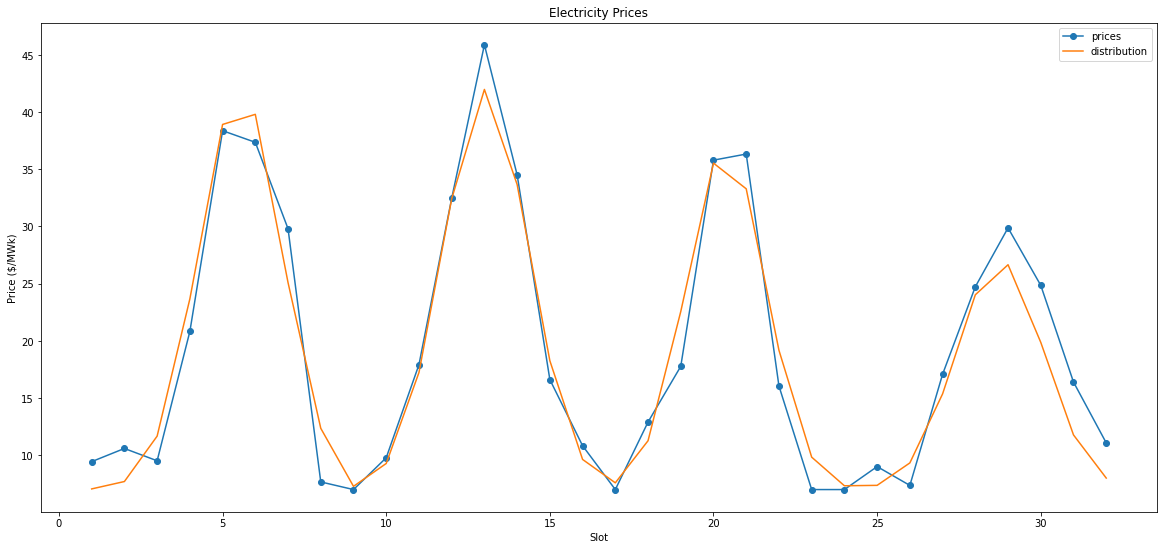

In [7]:
num_points = 1000

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q1)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices = [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution = [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q2)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q3)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q4)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

electricity_prices = [i + min_price for i in electricity_prices]
distribution = [i + min_price for i in distribution]

slots = range(1, 4*num_slots+1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)
plt.title("Electricity Prices")
plt.xlabel("Slot")
plt.ylabel("Price ($/MWk)")
plt.plot(slots, electricity_prices, "-o", label = "prices")
plt.plot(slots, distribution, label = "distribution")
plt.legend()
plt.show()

# Solar Power Generation

In [8]:
sp_mx_q1 = 200
sp_mx_q2 = 200
sp_mx_q3 = 250
sp_mx_q4 = 100
sp_k = 20

<Figure size 432x288 with 0 Axes>

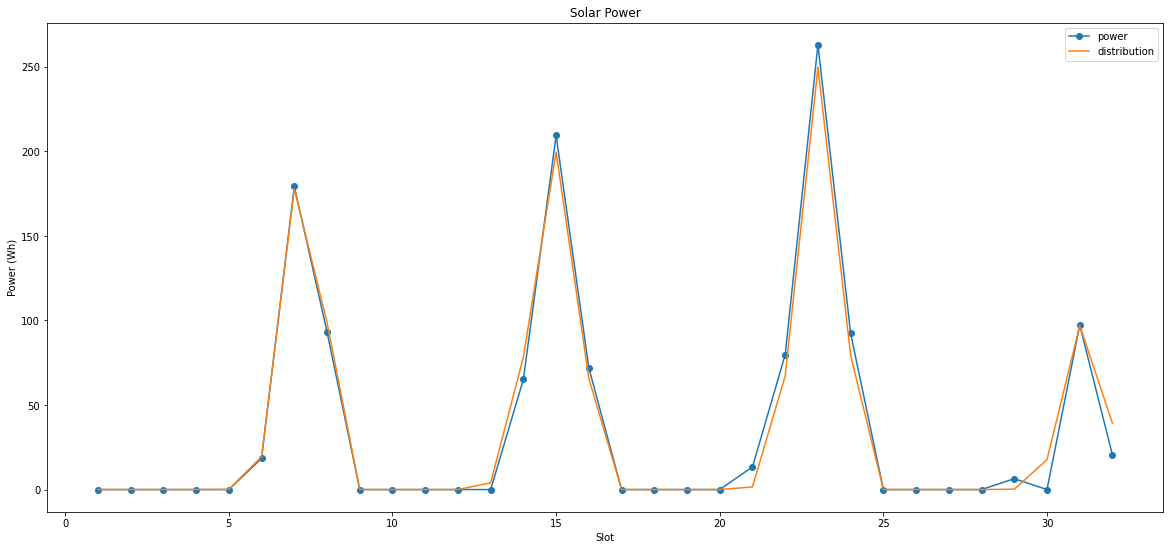

In [9]:
num_points = 1000

solar_power = [0.0 for i in range(num_slots - num_slots//2)]
distribution = [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q1)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q2)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q3)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q4)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]


slots = range(1,  4*num_slots+1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)
plt.title("Solar Power")
plt.xlabel("Slot")
plt.ylabel("Power (Wh)")
plt.plot(slots, solar_power, "-o", label = "power")
plt.plot(slots, distribution, label = "distribution")
plt.legend()
plt.show()

In [10]:
states = []
for i in range(1, num_slots + 1):
    price = electricity_prices[i-1]
    if i == 7:
        price = 5
    states.append((price, solar_power[i-1]))

states

[(9.440911812187093, 0.0),
 (10.59265586005788, 0.0),
 (9.516466028400759, 0.0),
 (20.820266129053426, 0.0),
 (38.376611263441944, 0),
 (37.36099924721819, 18.39189808037299),
 (5, 179.30521178594174),
 (7.667939665830704, 93.27930240577152)]

In [11]:
agents = appliance_df['Name'].tolist()
agent_actions = {}
for agent in agents:
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        agent_actions[agent] = ['on']
    elif (agent_data['Type'] == 'PS').bool():
        pr = agent_data['Power Rating (kWh)'].tolist()[0]
        agent_actions[agent] = [round(i, 1) for i in np.arange(pr[0], pr[1] + pr[2], pr[2])]
    elif (agent_data['Type'] == 'TS').bool():
        agent_actions[agent] = ['on', 'off']
agent_actions

{'Ref': ['on'],
 'AS': ['on'],
 'AC1': [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
 'AC2': [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
 'H': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
 'DW': ['on', 'off'],
 'L1': ['on', 'off'],
 'L2': ['on', 'off'],
 'WM': ['on', 'off']}

In [12]:
def in_slot(t, ts):
    if t + 1 >= ts[0] and t + 1 <= ts[1]:
            return True
    return False

In [13]:
without_DR_actions = {}
for t in range(num_slots):
    without_DR_actions[t] = {}
    for agent in agents:
        without_DR_actions[t][agent] = None
        act = None
        agent_data = appliance_df.loc[appliance_df['Name'] == agent]
        if (agent_data['Type'] == 'NS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                act = 'on'
        elif (agent_data['Type'] == 'PS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                act = pr[1]
        elif (agent_data['Type'] == 'TS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                if t + 1 == ts[0]:
                    act = 'on'
                else:
                    act = 'off'
        without_DR_actions[t][agent] = act

# Multi-Agent Q Learning

Agents take that action which maximizes their own expected cumulative reward.

In [14]:
cols = ['Name', 'Type', 'Diss. Coeff.', 'Power Rating (kWh)', 'Time Slot']

def get_reward_DR(st, t, agent, act, started):
    reward = 0.0
    cost = 0.0
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr)))
            cost = (-st[0] * max(0, (pr)))
    elif (agent_data['Type'] == 'PS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            dc = agent_data['Diss. Coeff.'].tolist()[0]
            reward = ((-st[0] * max(0, (act))) - (dc * math.pow(pr[1] - act, 2)))
            cost = (-st[0] * max(0, (act)))
    elif (agent_data['Type'] == 'TS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            dc = agent_data['Diss. Coeff.'].tolist()[0]
            if (act == 'on' or (t + 1 == ts[1])) and started[agent] != 1:
                reward = - (st[0] * max(0, pr) - (dc * math.pow(ts[0] - t - 1, 2)))
                cost = (-st[0] * max(0, (pr)))
                started[agent] = 1
    return round(reward, 6), cost, started

def get_reward_without_DR(st, t, agent):
    reward = 0.0
    cost = 0.0
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr)))
            cost = (-st[0] * max(0, (pr)))
    elif (agent_data['Type'] == 'PS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr[1])))
            cost = (-st[0] * max(0, (pr[1])))

    elif (agent_data['Type'] == 'TS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            if t + 1 == ts[0]:
                reward = - (st[0] * max(0, pr))
                cost = - (st[0] * max(0, pr))
    return round(reward, 6), cost


started = {}
for agent in agents:
        started[agent] = 0
print(get_reward_DR(states[6], 6, 'WM', 'on', started))
print(get_reward_without_DR(states[6], 6, 'WM'))

(-3.48, -3.5, {'Ref': 0, 'AS': 0, 'AC1': 0, 'AC2': 0, 'H': 0, 'DW': 0, 'L1': 0, 'L2': 0, 'WM': 1})
(0.0, 0.0)


In [15]:
num_timeslots = num_slots
num_episodes = 1000
epsilon = 0.3

gamma = 0.9
theta = 0.3

converged = 1
threshold = 0.001

recommendations = {}
actually_started = {}

for t in range(num_timeslots):
    actually_started[t] = {}
    for agent in agents:
        actually_started[t][agent] = 0

started = {}
for agent in agents:
        started[agent] = 0

Without_DR_total_reward = 0.0
With_DR_total_reward = 0.0

Without_DR_total_electricity_cost = 0.0
With_DR_total_electricity_cost = 0.0

average_time = 0

for t in range(num_timeslots):
    print('Slot: ', t + 1)
    start = time.time()
    recommendations[t] = {}
    Q = {}
    Q_prev = {}
    R = {}
    C = {}
    for st in states:
        Q[st] = {}
        Q_prev[st] = {}
        R[st] = {}
        C[st] = {}
        for agent in agents:
            Q[st][agent] = {}
            Q_prev[st][agent] = {}
            R[st][agent] = {}
            C[st][agent] = {}
            recommendations[t][agent] = None
    converged = 1
    for agent in agents:
        print('Appliance: ', agent)
        for st in states:
            for act in agent_actions[agent]:
                Q[st][agent][act] = 0.0
                Q_prev[st][agent][act] = 0.0
        if t > 0:
            started[agent] = actually_started[t - 1][agent]
        else:
            started[agent] = 0
        for eps in range(num_episodes):
            if t > 0:
                if actually_started[t-1][agent] != 1:
                    started[agent] = 0
            else:
                started[agent] = 0
            Q_prev = deepcopy(Q)
            st = states[t]
            itr = 0
            curr_t = t
            while curr_t < num_slots - 1:
                p = np.random.random()
                if p < epsilon:
                    j = np.random.choice(len(agent_actions[agent]))
                else:
                    j = np.argmax([Q[st][agent][a] for a in agent_actions[agent]])
                at = agent_actions[agent][j]
                sdash = states[curr_t + 1]
                R[st][agent][at], C[st][agent][at], started = get_reward_DR(st, curr_t, agent, at, started)
                Q[st][agent][at] = Q[st][agent][at] + theta * (R[st][agent][at] + gamma * max([Q[sdash][agent][act] for act in agent_actions[agent]]) - Q[st][agent][at]) 
                st = sdash
                curr_t += 1
            converged = 1
            for s in states:
                for a in agent_actions[agent]:
                    if abs(Q[s][agent][a] - Q_prev[s][agent][a]) > threshold:
                        converged = 0
            if converged == 1:
                conv_eps = eps
                break
        recommendations[t][agent] = agent_actions[agent][np.argmax([Q[states[t]][agent][a] for a in agent_actions[agent]])]
        agent_data = appliance_df.loc[appliance_df['Name'] == agent]
        slot = agent_data['Time Slot'].tolist()[0]
        if not in_slot(t, slot):
            recommendations[t][agent] = None
        if (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool() and actually_started[t][agent] == 1:
            recommendations[t][agent] = 'off'
        if recommendations[t][agent] == 'on' and (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool():
            if t + 1 < num_timeslots:
                actually_started[t + 1][agent] = 1
        if recommendations[t][agent] == 'off' and (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool() and actually_started[t][agent] == 0 and t + 1 ==  slot[1]:
            if t + 1 < num_timeslots: 
                actually_started[t + 1][agent] = 1
            recommendations[t][agent] = 'on'
    print(converged)
    end = time.time()
    print('Time taken to recommend (s): ', end-start)
    average_time += (end-start)
    print("Slot: ", t + 1, " | Recommendations: ", recommendations[t])


Slot:  1
Appliance:  Ref
Appliance:  AS
Appliance:  AC1
Appliance:  AC2
Appliance:  H
Appliance:  DW
Appliance:  L1
Appliance:  L2
Appliance:  WM
1
Time taken to recommend (s):  23.508538484573364
Slot:  1  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  2
Appliance:  Ref
Appliance:  AS
Appliance:  AC1
Appliance:  AC2
Appliance:  H
Appliance:  DW
Appliance:  L1
Appliance:  L2
Appliance:  WM
1
Time taken to recommend (s):  19.576934576034546
Slot:  2  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  3
Appliance:  Ref
Appliance:  AS
Appliance:  AC1
Appliance:  AC2
Appliance:  H
Appliance:  DW
Appliance:  L1
Appliance:  L2
Appliance:  WM
1
Time taken to recommend (s):  17.176204919815063
Slot:  3  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': N

In [16]:
Appliance_Without_DR_Cost = {}
Appliance_With_DR_Cost = {}

Timeslot_Without_DR_Cost = {}
Timeslot_With_DR_Cost = {}

Appliance_Without_DR_Reward = {}
Appliance_With_DR_Reward = {}

Without_DR_total_reward = 0
With_DR_total_reward = 0
Without_DR_total_electricity_cost = 0
With_DR_total_electricity_cost = 0

for agent in agents:
    Appliance_Without_DR_Cost[agent] = 0
    Appliance_With_DR_Cost[agent] = 0
    Appliance_Without_DR_Reward[agent] = 0
    Appliance_With_DR_Reward[agent] = 0

for t in range(num_timeslots):
    Timeslot_Without_DR_Cost[t] = 0
    Timeslot_With_DR_Cost[t] = 0
    for agent in agents:
        temp = deepcopy(actually_started)

        rew, c, actually_started[t] = get_reward_DR(states[t], t, agent, recommendations[t][agent], actually_started[t])
        actually_started = temp
        With_DR_total_reward += rew
        Appliance_With_DR_Reward[agent] -= rew
        With_DR_total_electricity_cost += c
        Appliance_With_DR_Cost[agent] -= c
        Timeslot_With_DR_Cost[t] -= c

        rew, c = get_reward_without_DR(states[t], t, agent)
        Without_DR_total_reward += rew
        Appliance_Without_DR_Reward[agent] -= rew
        Without_DR_total_electricity_cost += c
        Appliance_Without_DR_Cost[agent] -= c
        Timeslot_Without_DR_Cost[t] -= c

In [17]:
for t in range(num_timeslots):
    print("Slot: ", t + 1, " | Recommendations: ", recommendations[t])
    print("Slot: ", t + 1, " | Original Actions: ", without_DR_actions[t])
    print()

Slot:  1  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  1  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.4, 'AC2': 1.4, 'H': 1.5, 'DW': None, 'L1': None, 'L2': None, 'WM': None}

Slot:  2  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  2  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.4, 'AC2': 1.4, 'H': 1.5, 'DW': None, 'L1': None, 'L2': None, 'WM': None}

Slot:  3  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  3  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.4, 'AC2': 1.4, 'H': 1.5, 'DW': None, 'L1': None, 'L2': None, 'WM': None}

Slot:  4  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.2, 'AC2': 1.2, 'H': 1.3, 'DW': None, 'L1': None, 'L2': 'off', 'WM': None}
Slot:  4  | Original Action

In [18]:
from IPython.display import display
recom_data = {}
Recom_df = {}
for agent in agents:
    print('\n\nAppliance: ', agent, ' | Dis. Coef.: ', appliance_df.loc[appliance_df['Name'] == agent]['Diss. Coeff.'].tolist()[0])
    recom_data[agent] = [[t+1, without_DR_actions[t][agent], recommendations[t][agent], states[t][0]] for t in range(num_timeslots)]
    Recom_df[agent] = pd.DataFrame(recom_data[agent], columns=['Slot', 'Action without DR', 'Action with DR', 'Elec. Price ($/MWk)'])
    display(Recom_df[agent])



Appliance:  Ref  | Dis. Coef.:  100.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,on,on,9.440912
1,2,on,on,10.592656
2,3,on,on,9.516466
3,4,on,on,20.820266
4,5,on,on,38.376611
5,6,on,on,37.360999
6,7,on,on,5.000000
7,8,on,on,7.667940




Appliance:  AS  | Dis. Coef.:  100.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,on,on,9.440912
1,2,on,on,10.592656
2,3,on,on,9.516466
3,4,on,on,20.820266
4,5,on,on,38.376611
5,6,on,on,37.360999
6,7,on,on,5.000000
7,8,on,on,7.667940




Appliance:  AC1  | Dis. Coef.:  50.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.4,1.3,9.440912
1,2,1.4,1.3,10.592656
2,3,1.4,1.3,9.516466
3,4,1.4,1.2,20.820266
4,5,1.4,1.0,38.376611
5,6,1.4,1.0,37.360999
6,7,1.4,1.4,5.000000
7,8,1.4,0.7,7.667940




Appliance:  AC2  | Dis. Coef.:  50.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.4,1.3,9.440912
1,2,1.4,1.3,10.592656
2,3,1.4,1.3,9.516466
3,4,1.4,1.2,20.820266
4,5,1.4,1.0,38.376611
5,6,1.4,1.0,37.360999
6,7,1.4,1.4,5.000000
7,8,1.4,0.7,7.667940




Appliance:  H  | Dis. Coef.:  50.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.5,1.4,9.440912
1,2,1.5,1.4,10.592656
2,3,1.5,1.4,9.516466
3,4,1.5,1.3,20.820266
4,5,1.5,1.1,38.376611
5,6,1.5,1.1,37.360999
6,7,1.5,1.4,5.000000
7,8,1.5,0.5,7.667940




Appliance:  DW  | Dis. Coef.:  0.06


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,9.440912
1,2,None,None,10.592656
2,3,None,None,9.516466
3,4,None,None,20.820266
4,5,None,None,38.376611
5,6,on,off,37.360999
6,7,off,on,5.000000
7,8,off,off,7.667940




Appliance:  L1  | Dis. Coef.:  0.02


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,9.440912
1,2,None,None,10.592656
2,3,None,None,9.516466
3,4,None,None,20.820266
4,5,on,off,38.376611
5,6,off,off,37.360999
6,7,off,on,5.000000
7,8,None,off,7.667940




Appliance:  L2  | Dis. Coef.:  0.02


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,9.440912
1,2,None,None,10.592656
2,3,None,None,9.516466
3,4,on,off,20.820266
4,5,off,off,38.376611
5,6,off,off,37.360999
6,7,off,on,5.000000
7,8,None,off,7.667940




Appliance:  WM  | Dis. Coef.:  0.02


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,9.440912
1,2,None,None,10.592656
2,3,None,None,9.516466
3,4,None,None,20.820266
4,5,None,None,38.376611
5,6,on,on,37.360999
6,7,off,off,5.000000
7,8,off,on,7.667940


In [19]:
states

[(9.440911812187093, 0.0),
 (10.59265586005788, 0.0),
 (9.516466028400759, 0.0),
 (20.820266129053426, 0.0),
 (38.376611263441944, 0),
 (37.36099924721819, 18.39189808037299),
 (5, 179.30521178594174),
 (7.667939665830704, 93.27930240577152)]

In [20]:
appliance_df

,Name,Type,Diss. Coeff.,Power Rating (kWh),Time Slot
0,Ref,NS,100.00,0.5,"[1, 8]"
1,AS,NS,100.00,0.1,"[1, 8]"
2,AC1,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
3,AC2,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
4,H,PS,50.00,"[0.5, 1.5, 0.1]","[1, 8]"
8,DW,TS,0.06,0.3,"[6, 8]"
5,L1,TS,0.02,0.7,"[5, 7]"
6,L2,TS,0.02,0.7,"[4, 7]"
7,WM,TS,0.02,0.7,"[6, 8]"


## Assuming Recommendations are followed, cost with and w/o Demand Response

In [21]:
print('\n\nTotal reward without DR: ', Without_DR_total_reward)
print('Total reward with DR: ', With_DR_total_reward)

print('Total electricity cost without DR: ', -Without_DR_total_electricity_cost)
print('Total electricity cost with DR: ', -With_DR_total_electricity_cost)

print('Average Recommendation Time: ', average_time / num_timeslots)

print()
print()

dc = appliance_df['Diss. Coeff.'].tolist()
DC = {}
i = 0
for agent in agents:
    DC[agent] = dc[i]
    i += 1



Total reward without DR:  -758.800482
Total reward with DR:  -746.4765650000003
Total electricity cost without DR:  758.800478452296
Total electricity cost with DR:  588.8765646710536
Average Recommendation Time:  11.14659932255745




In [22]:
data = [[agent, Appliance_Without_DR_Cost[agent], Appliance_With_DR_Cost[agent], DC[agent], Appliance_Without_DR_Reward[agent], Appliance_With_DR_Reward[agent]] for agent in agents]
  
data.append(['Total', -Without_DR_total_electricity_cost, -With_DR_total_electricity_cost, '-', Without_DR_total_reward, With_DR_total_reward])
DR_df = pd.DataFrame(data, columns=['Name', 'Cost without DR (cents)', 'Cost with DR (cents)', 'Diss. Coef.', 'Reward without DR', 'Reward with DR'])
DR_df

,Name,Cost without DR (cents),Cost with DR (cents),Diss. Coef.,Reward without DR,Reward with DR
0,Ref,69.387925,69.387925,100.0,69.387926,69.387926
1,AS,13.877585,13.877585,100.0,13.877586,13.877586
2,AC1,194.286190,151.504531,50.0,194.286191,195.504531
3,AC2,194.286190,151.504531,50.0,194.286191,195.504531
4,H,208.163775,162.581735,50.0,208.163775,232.581734
5,DW,11.208300,1.500000,0.06,11.208300,1.440000
6,L1,26.863628,3.500000,0.02,26.863628,3.420000
7,L2,14.574186,3.500000,0.02,14.574186,3.320000
8,WM,26.152699,31.520257,0.02,26.152699,31.440257
9,Total,758.800478,588.876565,-,-758.800482,-746.476565


In [23]:
ts_data = [[t+1, Timeslot_Without_DR_Cost[t], Timeslot_With_DR_Cost[t], states[t][0], Timeslot_Without_DR_Cost[t]/states[t][0], Timeslot_With_DR_Cost[t]/states[t][0]] for t in range(num_timeslots)]
TS_df = pd.DataFrame(ts_data, columns=['Slot', 'Cost without DR (cents)', 'Cost with DR (cents)', 'Elec. Price ($/MWk)', 'Power Con. without DR (kWh)', 'Power Con. with DR (kWh)'])

TS_df

,Slot,Cost without DR (cents),Cost with DR (cents),Elec. Price ($/MWk),Power Con. without DR (kWh),Power Con. with DR (kWh)
0,1,46.260468,43.428194,9.440912,4.9,4.6
1,2,51.904014,48.726217,10.592656,4.9,4.6
2,3,46.630684,43.775744,9.516466,4.9,4.6
3,4,116.593490,89.527144,20.820266,5.6,4.3
4,5,214.909023,141.993462,38.376611,5.6,3.7
5,6,220.429896,164.388397,37.360999,5.9,4.4
6,7,24.500000,32.500000,5.000000,4.9,6.5
7,8,37.572904,24.537407,7.667940,4.9,3.2


**Time slot 7 might become overloaded with inclusion of more time shiftable appliances that can operate in that time slot.**

**Stubborn power shiftable appliances operating in that timeslot might worsen the situation.** 

**This might lead to safety concerns, energy shortage and can lead to faulty price predictions with a predicted low price but in reality the price shoots up as appliances preferred that timeslot previously leading to loss for the user instead of cost saving. Moreover, this predictability of trend might be exploitable by the power suppliers.**

**So, let's say we want to model a limit on global power consumption in each timeslot. This requires communication between the agents.**

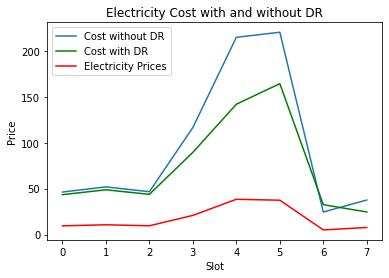

In [24]:
prices  = []
without_DR = []
with_DR = []
for t in range(num_timeslots):
    prices.append(states[t][0])
    with_DR.append(Timeslot_With_DR_Cost[t])
    without_DR.append(Timeslot_Without_DR_Cost[t])
plt.title('Electricity Cost with and without DR')
plt.xlabel('Slot')
plt.ylabel('Price')
plt.plot(range(num_timeslots), without_DR, label="Cost without DR")
plt.plot(range(num_timeslots), with_DR, label="Cost with DR", color='g')
plt.plot(range(num_timeslots), prices, label="Electricity Prices", color='r')
plt.legend()

In [25]:
Q_values = Q

### Hence, we see a 40-50% cost saving with DR than without DR.

In [26]:
EXPECTED_REWARD = Q

In [27]:
penalty = 0.1
lmt = 6

In [28]:
def act_to_pow(t, agent, act):
    pow = 0
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            pow = pr
    elif (agent_data['Type'] == 'PS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            pow = pr[1]
    elif (agent_data['Type'] == 'TS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts)  and act == 'on':
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            pow = pr
    return pow

In [29]:
def get_small_reward_with_DR(t, agent, act):
    reward = 0.0
    cost = 0.0
    reward = EXPECTED_REWARD[states[t]][agent][act]
    pow = act_to_pow(t, agent, act)
    return round(reward, 6), pow, act

def get_small_global_reward_with_DR(t, actions, penalty_factor, limit):
    global_reward = 0
    total_power = 0
    for agent in agts:
        act = actions[agent]
        global_reward += get_small_reward_with_DR(t, agent, act)[0]
        total_power += get_small_reward_with_DR(t, agent, act)[1]
    if total_power > limit:
        global_reward -= penalty_factor * (total_power - limit)
    return global_reward

In [30]:
agts = agents
app_df = appliance_df

In [31]:
recommendations[6]

{'Ref': 'on',
 'AS': 'on',
 'AC1': 1.4,
 'AC2': 1.4,
 'H': 1.4,
 'DW': 'on',
 'L1': 'on',
 'L2': 'on',
 'WM': 'off'}

In [32]:
max_games = 1000
num_games = 50
alpha = 0.3
eps = 0.3

recomm = {}
avg_time = 0

t = 6
start = time.time()
recomm[t] = {}
freq = {}
Q = {}
p = {}
immediate_local_rewards = {}
my_action_history = {}
for agent in agts:
    my_action_history[agent] = {}
    freq[agent] = {}
    Q[agent] = {}
    p[agent] = {}
flag = 0
game_count = -1
max_immediate_local_reward = float('-inf')
converged = 0
for agent in agts:
    recomm[t][agent] = None
    actions = agent_actions[agent]
    for act in actions:
        freq[agent][act] = 0
        Q[agent][act] = random.random()
        p[agent][act] = 0 

for game in range(max_games):  
    game_count += 1
    immediate_local_rewards[game_count] = {}
    for agent in agts:
        immediate_local_rewards[game_count][agent] = {}  
        actions = agent_actions[agent]  
        sum_Q = 0
        for a in actions:
            sum_Q += Q[agent][a]
        probs = []
        for act in actions:
            prob_list = [1/len(actions), Q[agent][act]/sum_Q]
            p[agent][act] = random.choices(prob_list, weights=(eps, 1-eps))[0]
            probs.append(p[agent][act])
        probs = [int(i*1000) for i in probs]
        action = random.choices(actions, weights=tuple(probs))[0]
        my_action_history[agent][game_count] = action
        immediate_local_rewards[game_count][agent]['reward'] = get_small_reward_with_DR(t, agent, action)[0]
        immediate_local_rewards[game_count][agent]['action'] = get_small_reward_with_DR(t, agent, action)[2]
        if game_count == num_games:
            converged = 1
            for a in actions:
                num_act_in_last_ns = 0
                num_max_in_last_ns = 0
                for game_no in range(num_games):
                    if my_action_history[agent][game_no] == a:
                        num_act_in_last_ns += 1
                        player_actions = {}
                        for ag in agts:
                            player_actions[ag] = immediate_local_rewards[game_no][ag]['action']
                        temp = get_small_global_reward_with_DR(t, player_actions, penalty, lmt)
                        # print(max_immediate_local_reward, temp, player_actions)
                        if abs(temp - max_immediate_local_reward) < 0.0001:
                            num_max_in_last_ns += 1
                        elif temp > max_immediate_local_reward:
                            max_immediate_local_reward = temp
                            num_max_in_last_ns = 0
                if num_act_in_last_ns > 0:
                    freq[agent][a] = num_max_in_last_ns / num_act_in_last_ns
                if abs(alpha * (freq[agent][a] - Q[agent][a])) > 0.001:
                    converged = 0
                Q[agent][a] = Q[agent][a] + alpha * (freq[agent][a] - Q[agent][a])
                flag = 1
    if flag == 1:
        if converged == 1:
            print('converged', game)
            break
        game_count = -1
        flag = 0
        for ag in agents:
            my_action_history[agent] = {}

for a in agts:
    recomm[t][a] = max(Q[a], key=Q[a].get)
end = time.time()
avg_time += (end-start)
print('Average Recommendation Time: ', avg_time)

Average Recommendation Time:  143.12310242652893


In [33]:
recomm[6]

{'Ref': 'on',
 'AS': 'on',
 'AC1': 1.3,
 'AC2': 1.4,
 'H': 0.9,
 'DW': 'on',
 'L1': 'off',
 'L2': 'off',
 'WM': 'off'}

In [34]:
recommendations[6]

{'Ref': 'on',
 'AS': 'on',
 'AC1': 1.4,
 'AC2': 1.4,
 'H': 1.4,
 'DW': 'on',
 'L1': 'on',
 'L2': 'on',
 'WM': 'off'}

In [35]:
before_total_power = 0
t = 6
for agent in agts:
    before_total_power += act_to_pow(t, agent, recommendations[t][agent])
before_total_power

6.6000000000000005

In [36]:
lmt

6

In [37]:
after_total_power = 0
t = 6
for agent in agts:
    after_total_power += act_to_pow(t, agent, recomm[t][agent])
after_total_power

5.2